In [15]:
import pandas as pd
from scipy.cluster.vq import kmeans,vq,whiten
from sklearn.svm import SVR
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import AdaBoostRegressor
import time
import matplotlib.pyplot as plt
import matplotlib.pyplot as ax5

In [16]:
start_time = time.time()

In [17]:
dataset = pd.read_csv('hidrat_data.csv')

In [18]:
dataset = dataset.iloc[:,[1,2,3,4,5]].values

In [19]:
 # whitening of data
# dataset = whiten(dataset)
scale = StandardScaler()
dataset=scale.fit_transform(dataset)

In [20]:
# computing K-Means with K = 10 (10 clusters)
centroids,_ = kmeans(dataset,10)
centroids

array([[-1.00941454,  2.55699073,  0.70715602,  0.37504635, -0.22285082],
       [ 0.45735433, -0.30168768,  0.33489776, -0.98104289, -0.22285082],
       [-1.25603753,  0.790764  , -3.66281497,  1.82368944,  4.4796975 ],
       [-0.78945633, -0.30906102,  0.70144511, -1.10098528, -0.22285082],
       [ 0.54963226, -0.03988484,  0.038031  ,  0.90776182, -0.22285082],
       [ 1.14966661, -4.20648181,  0.15724507, -1.35614594, -0.22285082],
       [ 0.50773022, -0.25541646, -0.76833648,  0.05592785, -0.22285082],
       [ 1.92483902, -0.04355357, -0.36965775,  0.9346003 , -0.22285082],
       [-0.54500035,  0.77010373, -0.32854553,  0.23339647, -0.22285082],
       [-0.93021315, -0.04295977,  0.78131706,  0.71911853, -0.22285082]])

In [21]:
# assign each sample to a cluster
clx,_ = vq(dataset,centroids)
clx

array([0, 0, 0, ..., 2, 2, 2])

In [22]:
# The coordinates of each data are replaced by the coordinates of the center of the cluster in train dataset
dataset_vq = np.zeros((len(clx),centroids.shape[1]))
for i in range(len(clx)):
    dataset_vq[i] = centroids[clx[i]]
dataset_vq= scale.inverse_transform(dataset_vq)
dataset_vq

array([[2.42892893e+04, 4.89946429e+00, 1.25890669e+03, 1.00678571e+01,
        6.10622664e-16],
       [2.42892893e+04, 4.89946429e+00, 1.25890669e+03, 1.00678571e+01,
        6.10622664e-16],
       [2.42892893e+04, 4.89946429e+00, 1.25890669e+03, 1.00678571e+01,
        6.10622664e-16],
       ...,
       [8.80873506e+03, 3.10274637e+00, 5.22751616e+02, 1.80290792e+01,
        9.98384491e-01],
       [8.80873506e+03, 3.10274637e+00, 5.22751616e+02, 1.80290792e+01,
        9.98384491e-01],
       [8.80873506e+03, 3.10274637e+00, 5.22751616e+02, 1.80290792e+01,
        9.98384491e-01]])

In [23]:
X = dataset_vq[:,[0,1,3,4]]
Y = dataset_vq[:,[2]]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1234)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1234)

In [25]:
st_x = StandardScaler()
X_train=st_x.fit_transform(X_train)
st_y = StandardScaler()
y_train=st_y.fit_transform(y_train)
X_test=st_x.fit_transform(X_test)
y_test=st_y.fit_transform(y_test)

In [26]:
model = AdaBoostRegressor(n_estimators=100)

In [27]:
# fit the model on the whole dataset
model.fit(X_train, y_train)

C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


AdaBoostRegressor(n_estimators=100)

C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


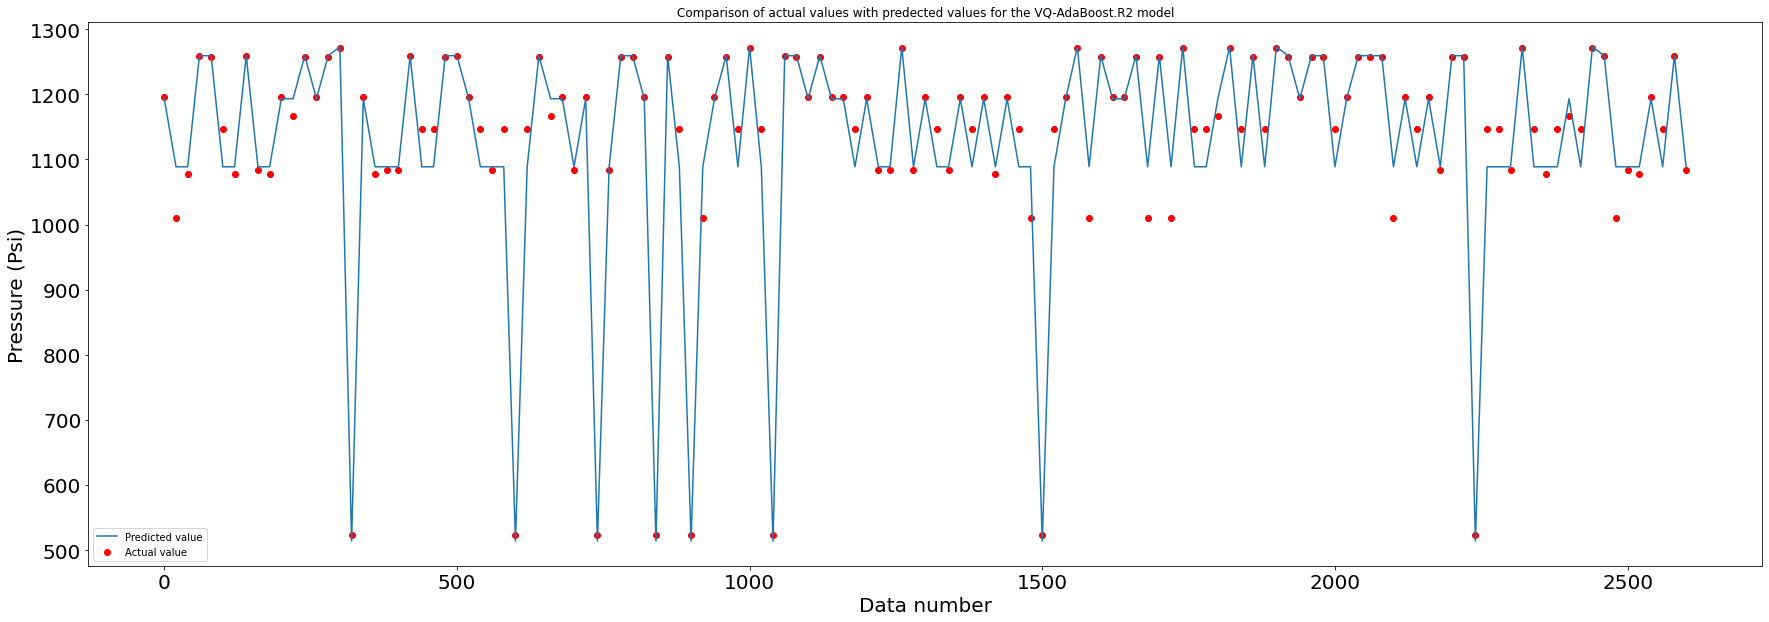

In [28]:
test_num = []
for i in range(len(y_test)):
    test_num.append(i)
test_num = test_num[::20]
model_predict = model.predict(X_test)
model_predict = st_y.inverse_transform(model_predict)
y_test2 = st_y.inverse_transform(y_test)
model_predict2=model_predict[::20]
y_test_each20 = y_test2[::20]
fig = plt.figure(figsize=(30, 10))
ax2 = fig.add_subplot(111)
ax2.plot(test_num,model_predict2, label='Predicted value')
ax2.scatter(test_num,y_test_each20 , label = 'Actual value',color= 'red')
ax2.set_title('Comparison of actual values with predected values for the VQ-AdaBoost.R2 model')
ax2.set_xlabel('Data number',size = 20)
ax2.set_ylabel('Pressure (Psi)',size=20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
ax2.legend()
fig.show()

No handles with labels found to put in legend.


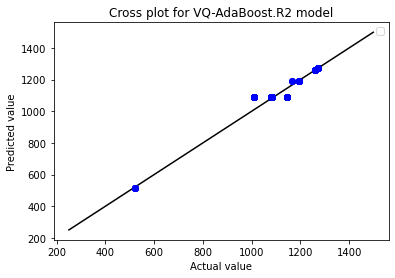

In [29]:
cross = []
i = 250
while i!=1500:
    cross.append(i)
    i = i+1
ax5.plot(cross,cross, color='black')
ax5.plot(y_test2,model_predict,'bo',markersize=5, color='blue')
# ax5.plot(y_train,model_predict_train,'bo', markersize=3,label='Train Data', color='red',marker = '<')
ax5.title('Cross plot for VQ-AdaBoost.R2 model')
ax5.xlabel('Actual value')
ax5.ylabel('Predicted value')
ax5.legend()
ax5.show()

In [30]:
r2_score(y_train, model.predict(X_train))

0.9613027422353082

In [31]:
mean_squared_error(y_train, model.predict(X_train))

0.03869725776469176

In [32]:
r2_score(y_test, model.predict(X_test))

0.964803720483695

In [33]:
mean_squared_error(y_test, model.predict(X_test))

0.03519627951630497

In [34]:
time.time() - start_time

2.855246067047119